In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import bpl


In [2]:
import sys
from wcpredictor import WCPred

## Neutral Model, Results Since 2018 + FIFA Rankings

In [3]:
results = pd.read_csv('../wcpredictor/data/match_results_since_2018.csv', parse_dates=['date'])

fifa_rankings = pd.read_csv('../data/fifa_rankings.csv')
wc_teams = pd.read_csv("../data/teams.csv")

wc_pred = WCPred(results = results, ratings=fifa_rankings)

In [4]:
wc_pred.fit_model()

[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:21<00:00, 68.31it/s, 31 steps of size 1.19e-01. acc. prob=0.88]


In [8]:
wc_teams_idx = {team: idx for idx, team in enumerate(wc_pred.model.teams)
                if team in wc_teams["Team"].values}

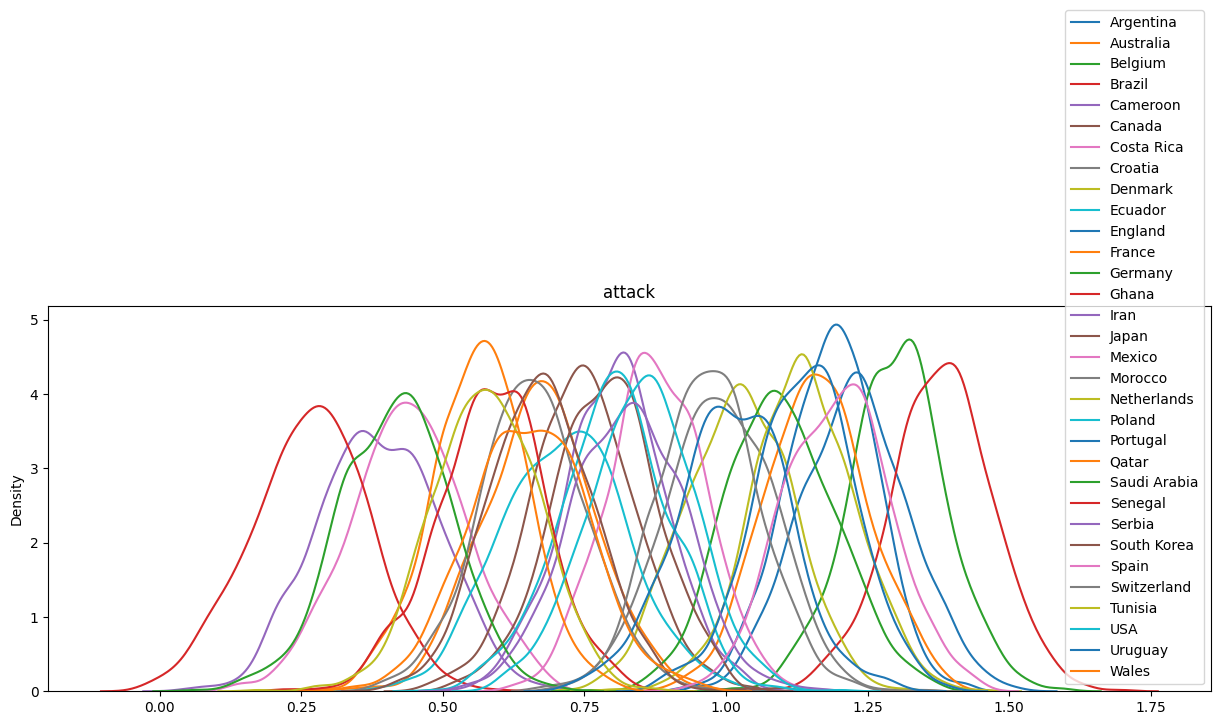

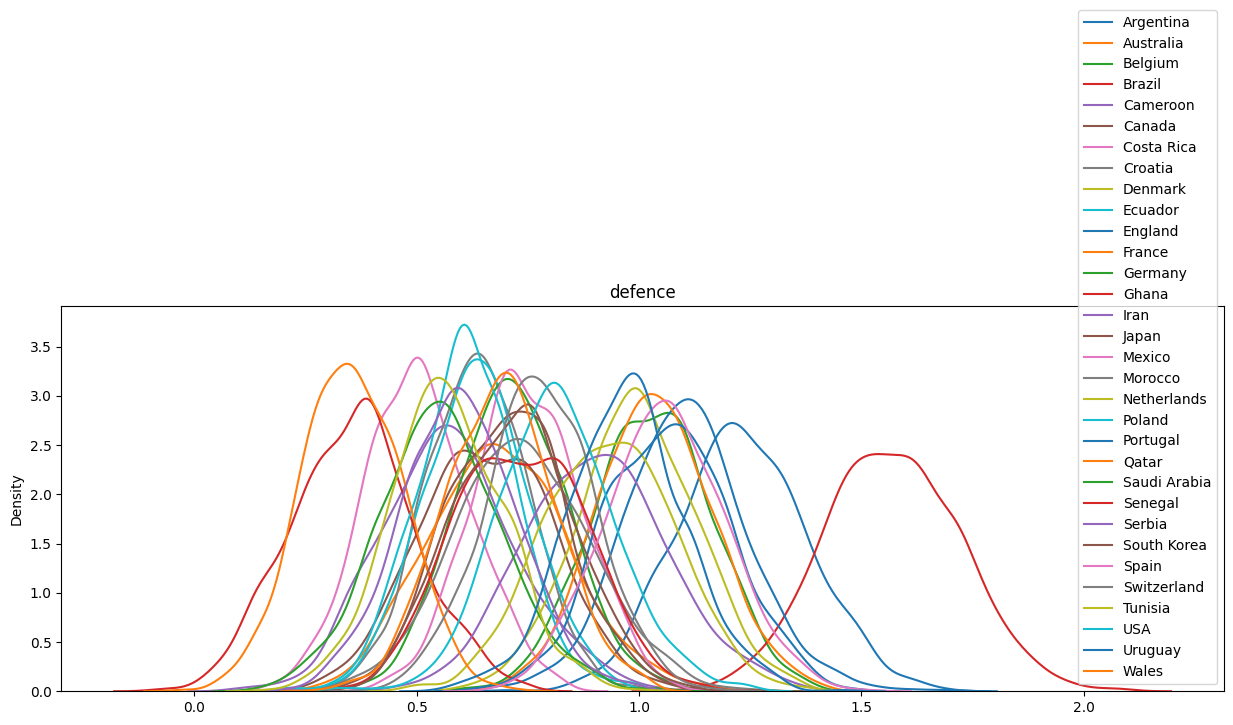

In [9]:
ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.attack[:, idx], label=team)
plt.title('attack')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.defence[:, idx], label=team)
plt.title('defence')
plt.legend()

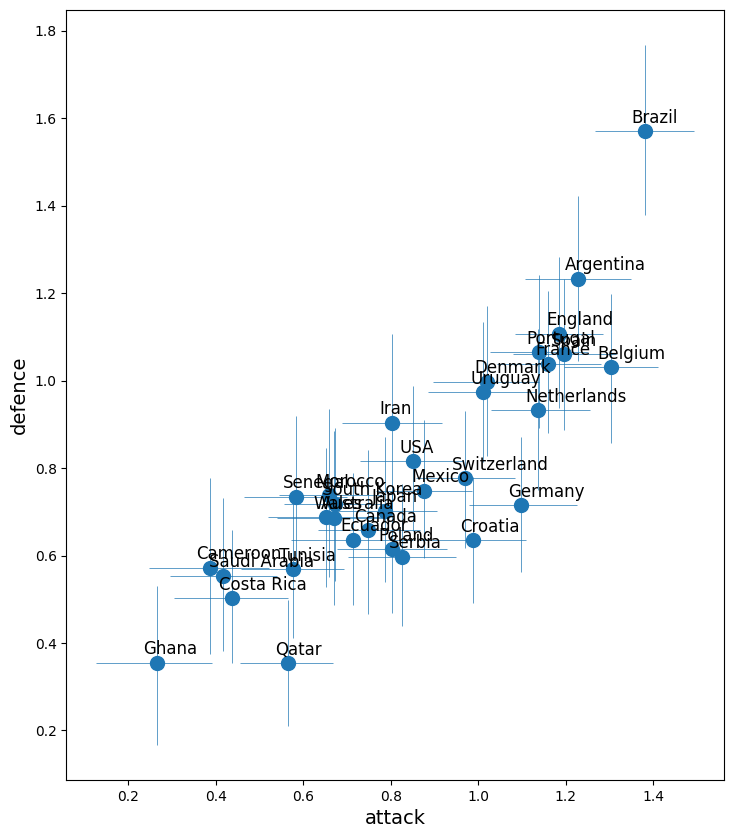

In [10]:
a_mean = wc_pred.model.attack.mean(axis=0)
b_mean = wc_pred.model.defence.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.attack,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.defence, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.attack,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.defence, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('attack', fontsize=14)
plt.ylabel('defence', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)


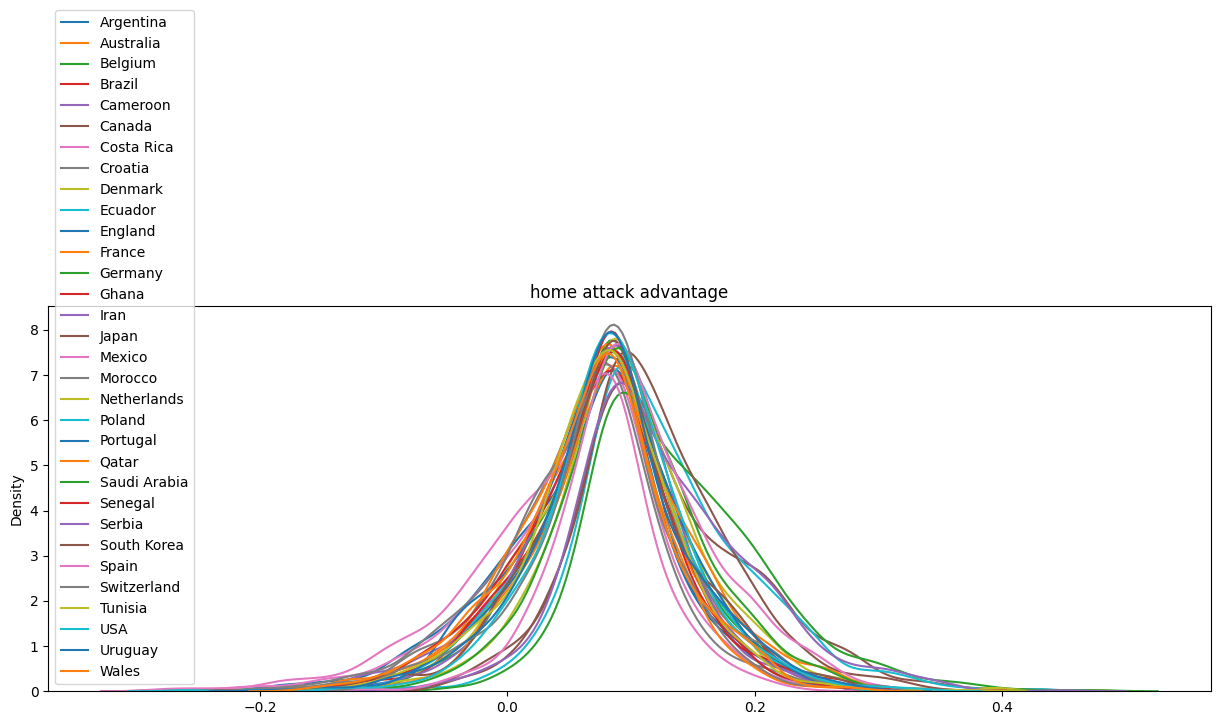

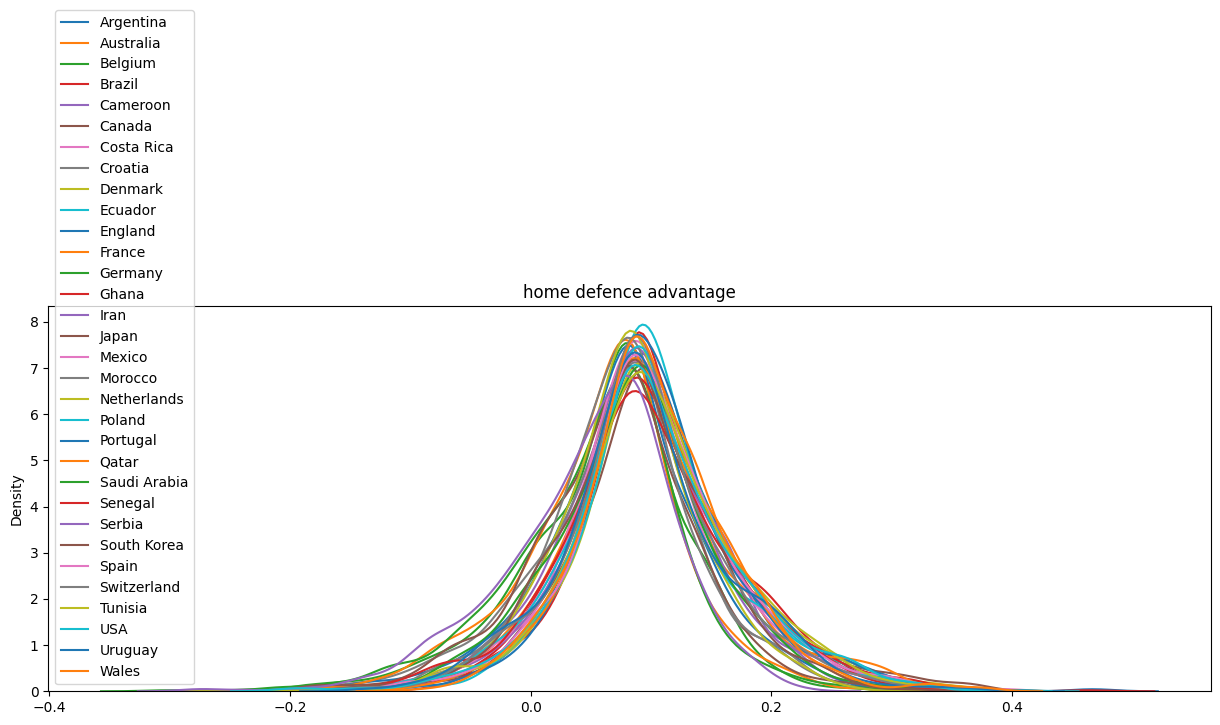

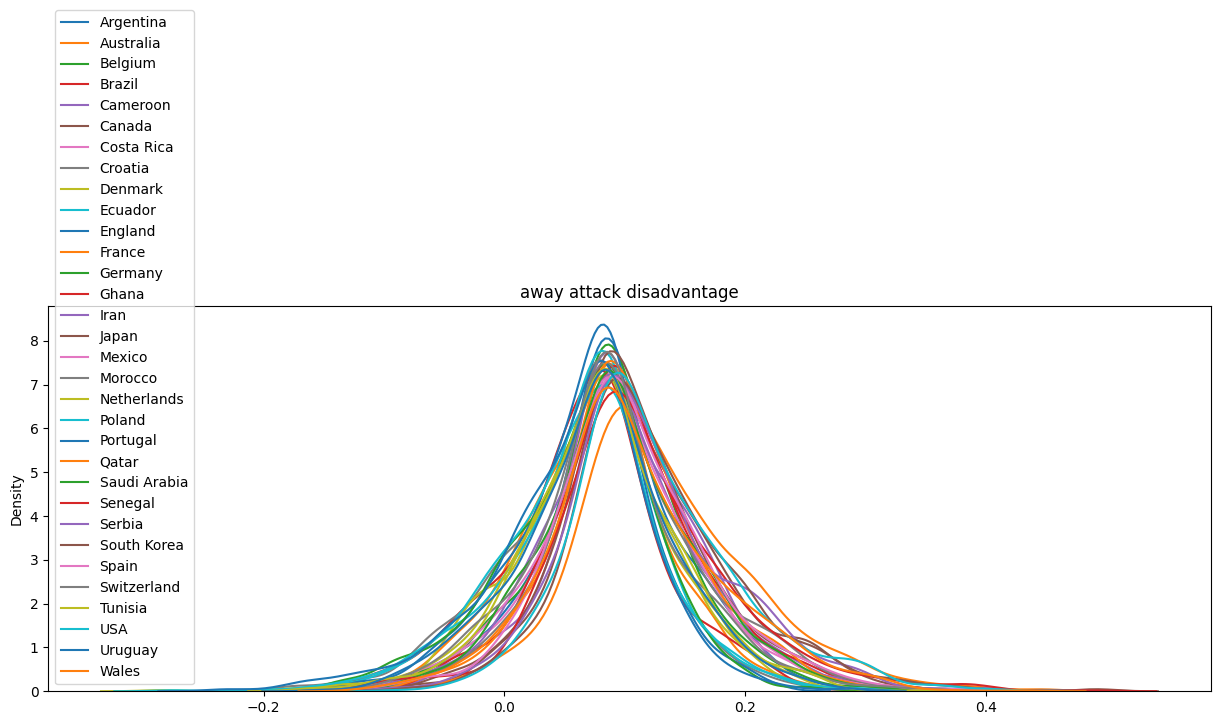

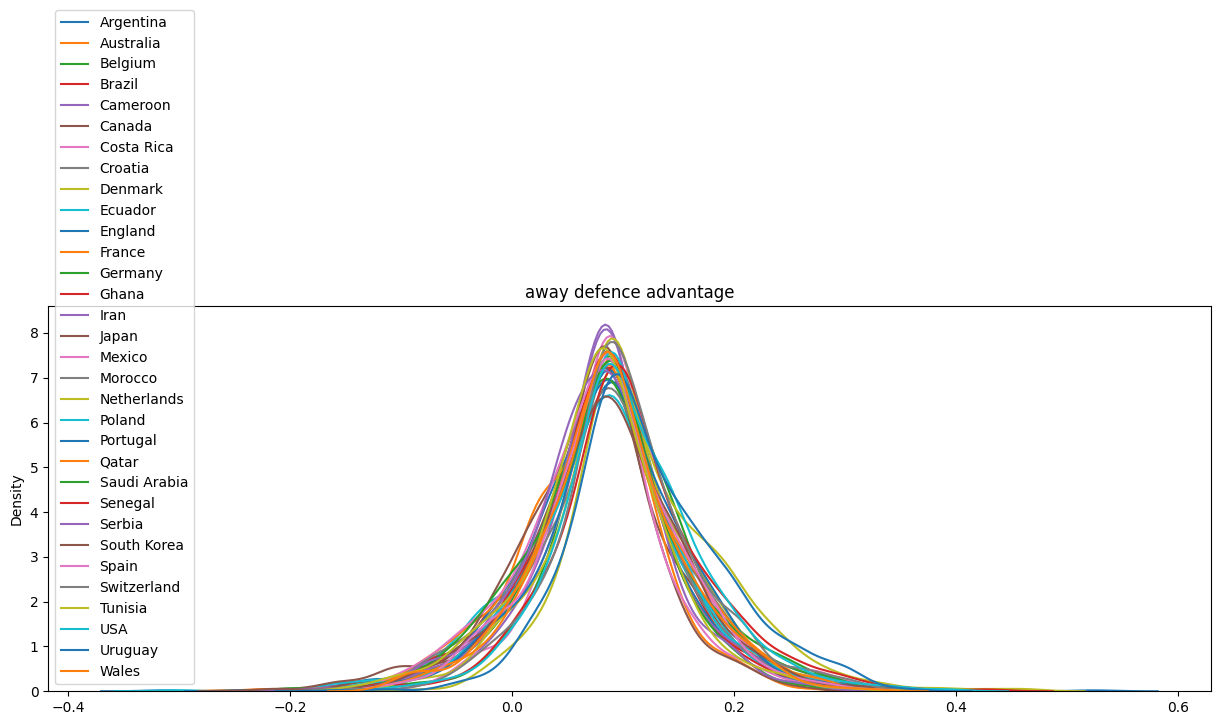

In [11]:
ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.home_attack_advantage[:, idx], label=team)
plt.title('home attack advantage')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.home_defence_advantage[:, idx], label=team)
plt.title('home defence advantage')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.away_attack_disadvantage[:, idx], label=team)
plt.title('away attack disadvantage')
plt.legend()

ax = plt.figure(figsize=(15, 5)).gca()
for team, idx in wc_teams_idx.items():
    sns.kdeplot(wc_pred.model.away_defence_disadvantage[:, idx], label=team)
plt.title('away defence advantage')
plt.legend()

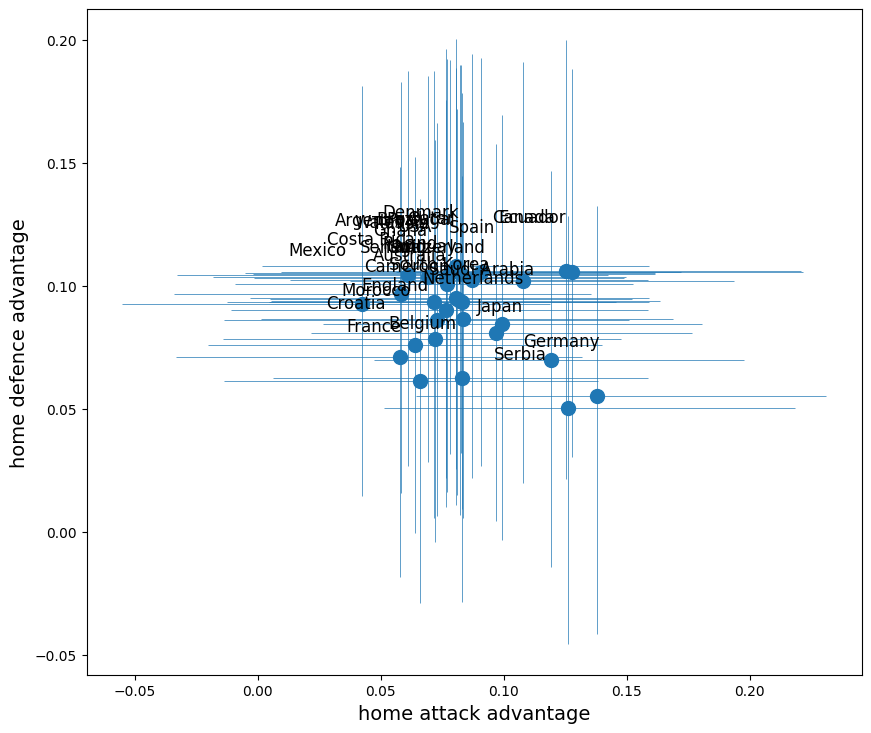

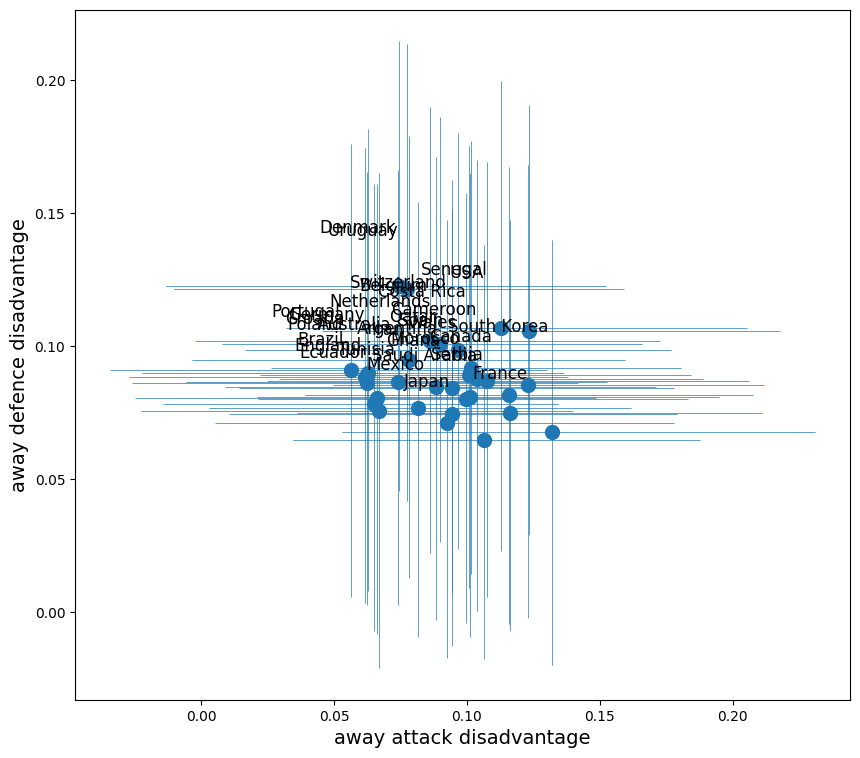

In [12]:
a_mean = wc_pred.model.home_attack_advantage.mean(axis=0)
b_mean = wc_pred.model.home_defence_advantage.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.home_attack_advantage,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.home_defence_advantage, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.home_attack_advantage,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.home_defence_advantage, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('home attack advantage', fontsize=14)
plt.ylabel('home defence advantage', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)

    
    
a_mean = wc_pred.model.away_attack_disadvantage.mean(axis=0)
b_mean = wc_pred.model.away_defence_disadvantage.mean(axis=0)

a_conf95 = np.abs(np.quantile(wc_pred.model.away_attack_disadvantage,[0.025, 0.975], axis=0) - a_mean)
b_conf95 = np.abs(np.quantile(wc_pred.model.away_defence_disadvantage, [0.025, 0.975], axis=0) - b_mean)
a_conf80 = np.abs(np.quantile(wc_pred.model.away_attack_disadvantage,[0.1, 0.9], axis=0) - a_mean)
b_conf80 = np.abs(np.quantile(wc_pred.model.away_defence_disadvantage, [0.1, 0.9], axis=0) - b_mean)

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.set_aspect('equal')
select_idx = np.array(list(wc_teams_idx.values()), dtype=int)
plt.errorbar(a_mean[select_idx],
             b_mean[select_idx],
             xerr=a_conf80[:, select_idx],
             yerr=b_conf80[:, select_idx],
             marker='o', markersize=10,
             linestyle='', linewidth=0.5)
plt.xlabel('away attack disadvantage', fontsize=14)
plt.ylabel('away defence disadvantage', fontsize=14)

for team, idx in wc_teams_idx.items():
    ax.annotate(team,
                (a_mean[idx]-0.03, b_mean[idx]+0.02), 
                fontsize=12)


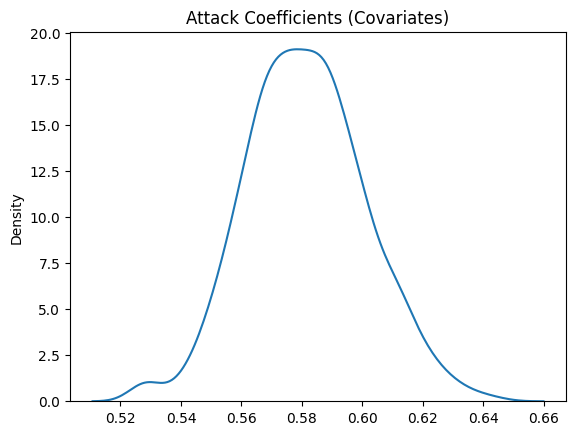

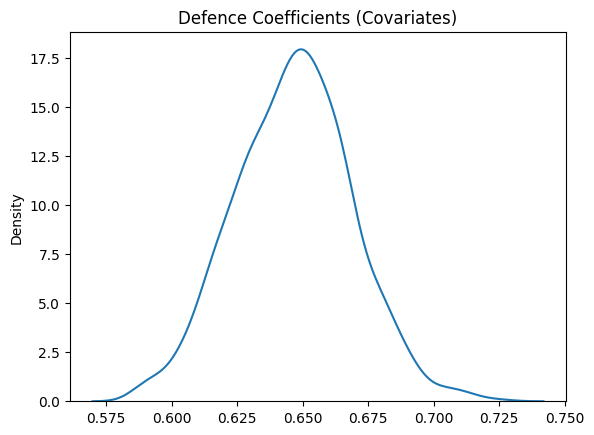

In [13]:
if wc_pred.model.attack_coefficients is not None:
    plt.figure()
    for i in range(wc_pred.model.attack_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.attack_coefficients[:, i])
    plt.title("Attack Coefficients (Covariates)")

    plt.figure()
    for i in range(wc_pred.model.defence_coefficients.shape[1]):
        sns.kdeplot(wc_pred.model.defence_coefficients[:, i])
    plt.title("Defence Coefficients (Covariates)")

## Try Including More Years (but without FIFA rankings)

- fit up to end of 2020
- test on 2021 and 2022

In [16]:
results = pd.read_csv('../data/results.csv', parse_dates=['date'])

def filter_results(year_from, year_until, teams=None):
    r = results[(results.date.dt.year >= year_from) & (results.date.dt.year <= year_until)]
    if teams:
        r = r[(r["home_team"].isin(teams)) & (r["away_team"].isin(teams))]
    return r

def fit_model_between(year_from, year_until):
    r = filter_results(year_from, year_until)
    wc_pred = WCPred(results = r)
    wc_pred.fit_model()
    return wc_pred.model


def test_model_between(model, year_from, year_until):
    r = filter_results(year_from, year_until, model.teams)
    proba = model.predict_score_proba(
        np.array(r["home_team"]),
        np.array(r["away_team"]),
        np.array(r["home_score"]),
        np.array(r["away_score"]),
        np.array(r["neutral"]),
    )
    return np.log(proba).sum() / len(proba)  # log likelihood


In [17]:
years = [
    1872, 1900, 1925, 1950, 1975, 2000,
    2004, 2008, 2010, 2011, 2012, 2013,
    2014, 2015, 2016, 2017, 2018, 2019,
    2020
]
train_until = 2020
test_from = 2021
test_until = 2022

likelihoods = []

for y in years:
    print("=======")
    print(y)
    print("=======")
    model = fit_model_between(y, train_until)
    likelihoods.append(test_model_between(model, test_from, test_until))


1872
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [03:39<00:00,  6.83it/s, 63 steps of size 1.00e-01. acc. prob=0.86]


1900
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [03:40<00:00,  6.79it/s, 63 steps of size 8.49e-02. acc. prob=0.88]


1925
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [03:29<00:00,  7.15it/s, 63 steps of size 7.44e-02. acc. prob=0.90]


1950
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [03:26<00:00,  7.25it/s, 63 steps of size 8.15e-02. acc. prob=0.88]


1975
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [02:36<00:00,  9.56it/s, 63 steps of size 6.16e-02. acc. prob=0.93]


2000
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [01:23<00:00, 17.87it/s, 31 steps of size 1.08e-01. acc. prob=0.90]


2004
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [01:05<00:00, 22.93it/s, 31 steps of size 1.29e-01. acc. prob=0.86]


2008
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:51<00:00, 29.25it/s, 31 steps of size 1.44e-01. acc. prob=0.85]


2010
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:46<00:00, 32.10it/s, 31 steps of size 1.44e-01. acc. prob=0.86]


2011
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:40<00:00, 37.43it/s, 31 steps of size 1.29e-01. acc. prob=0.88]


2012
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:37<00:00, 39.88it/s, 31 steps of size 1.38e-01. acc. prob=0.88]


2013
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:33<00:00, 44.98it/s, 31 steps of size 1.35e-01. acc. prob=0.88]


2014
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:27<00:00, 53.80it/s, 31 steps of size 1.27e-01. acc. prob=0.88]


2015
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:26<00:00, 56.84it/s, 31 steps of size 1.36e-01. acc. prob=0.87]


2016
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:22<00:00, 66.08it/s, 31 steps of size 1.56e-01. acc. prob=0.87]


2017
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:19<00:00, 75.48it/s, 31 steps of size 1.64e-01. acc. prob=0.85]


2018
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|███████████████████████| 1500/1500 [00:17<00:00, 83.48it/s, 63 steps of size 9.05e-02. acc. prob=0.95]


2019
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|██████████████████████| 1500/1500 [00:11<00:00, 127.32it/s, 31 steps of size 1.51e-01. acc. prob=0.85]


2020
[MODEL FITTING] Setting training data for the model
[MODEL FITTING] Fitting the model


sample: 100%|██████████████████████| 1500/1500 [00:07<00:00, 203.21it/s, 31 steps of size 1.65e-01. acc. prob=0.90]


Text(0, 0.5, 'log likelihood (2021 - 2022)')

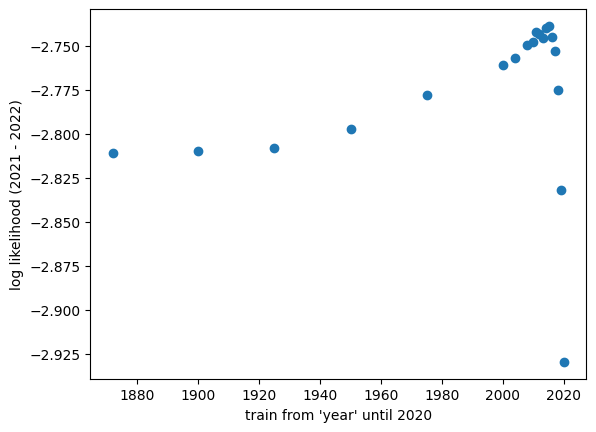

In [18]:
plt.plot(years, likelihoods, "o")
plt.xlabel(f"train from 'year' until {train_until}")
plt.ylabel(f"log likelihood ({test_from} - {test_until})")

In [19]:
pd.Series(likelihoods, index=years)

1872   -2.810954
1900   -2.809820
1925   -2.808161
1950   -2.797203
1975   -2.777954
2000   -2.760764
2004   -2.756852
2008   -2.749497
2010   -2.748038
2011   -2.742381
2012   -2.743545
2013   -2.745612
2014   -2.739654
2015   -2.738692
2016   -2.744995
2017   -2.752729
2018   -2.775310
2019   -2.831954
2020   -2.929578
dtype: float64

Max likelihood at 2015, i.e. when training with 6 full years of data.

So for World Cup 2022 may want to include 2016-2022 results.